## MAT 653 
#### Wei Li

### Factorization

#### generate multivariate normal using Cholesky

In [4]:
import numpy as np

def mvrnorm(nsim, mu, Sigma):
    """
    Generate multivariate normal using Cholesky decomposition.
    
    Parameters:
    - nsim: number of rows
    - mu: p-dim vector
    - Sigma: p by p variance matrix
    
    Returns:
    - A matrix of multivariate normals (nsim by p)
    """
    p = Sigma.shape[1]
    out = np.random.randn(nsim, p) @ np.linalg.cholesky(Sigma)
    out += np.tile(mu, (nsim, 1))
    return out

# ALWAYS SET-UP A SEED NUMBER before generating random numbers!
np.random.seed(1)
mu = np.array([1, 2, 3])
Sigma = np.diag([0.3, 0.3, 0.1])
output = mvrnorm(10, mu, Sigma)

output

array([[1.8896906 , 1.66492721, 2.83297743],
       [0.41231088, 2.47400328, 2.27218956],
       [1.95567276, 1.58306981, 3.10088902],
       [0.86341422, 2.8008295 , 2.34852631],
       [0.82340482, 1.78964477, 3.35852938],
       [0.39756474, 1.90555718, 2.72239679],
       [1.02312142, 2.31922104, 2.65195366],
       [1.626991  , 2.49382158, 3.15890266],
       [1.49341912, 1.62550683, 2.9611387 ],
       [0.48745797, 1.85327166, 3.16771312]])

#### solving OLS using QR

In [12]:
# Set up data and parameters
n = 50
x = np.linspace(1, 500, n)
X = np.column_stack((np.ones(n), x, x**2, x**3))
beta = np.array([[1], [1], [1], [1]])

# ALWAYS SET-UP A SEED NUMBER before generating random numbers!
np.random.seed(1)

y = X @ beta + np.random.randn(n, 1)

# Display the matrix and its log
matrix_mult = X.T @ X
log_matrix_mult = np.log(matrix_mult)

print(np.linalg.cond(X.T @ X)) # 3.3487780435166812e+16 very large! ill-conditioned matrix

# Try to solve OLS
ols_solution1 = np.linalg.inv(X.T @ X) @ X.T @ y
ols_solution2 = np.linalg.solve(X.T @ X, X.T @ y)
ols_solution1, ols_solution2

# np.linalg.inv, np.linalg.solve calls one of the gesv LAPACK routines, which first factorizes A using LU decomposition

(array([[0.89915507],
        [1.00165048],
        [0.99998409],
        [1.00000003]]),
 array([[0.89914327],
        [1.00165052],
        [0.99998409],
        [1.00000003]]))

In [14]:
# Use QR to solve OLS
Q, R = np.linalg.qr(X)
betahat = np.linalg.solve(R, Q.T @ y)

print(betahat)

3.3487780435166812e+16
[[0.89914235]
 [1.00165054]
 [0.99998409]
 [1.00000003]]


 #### PCA

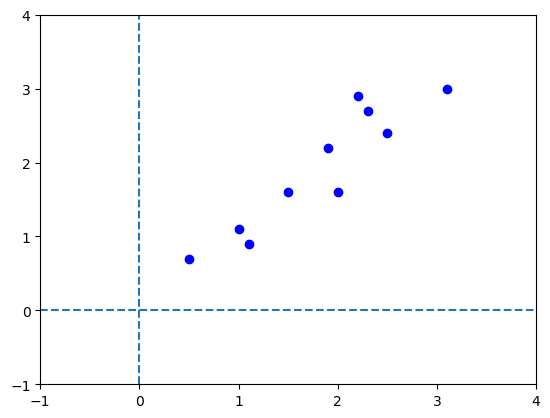

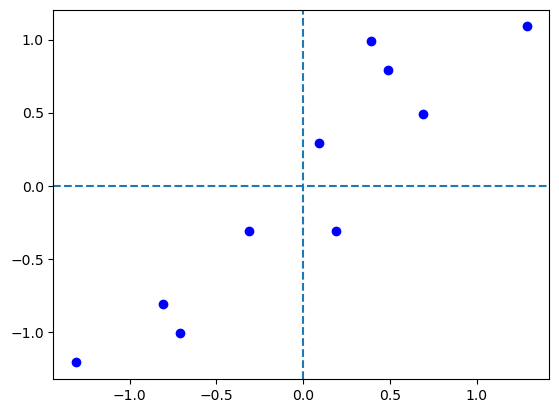

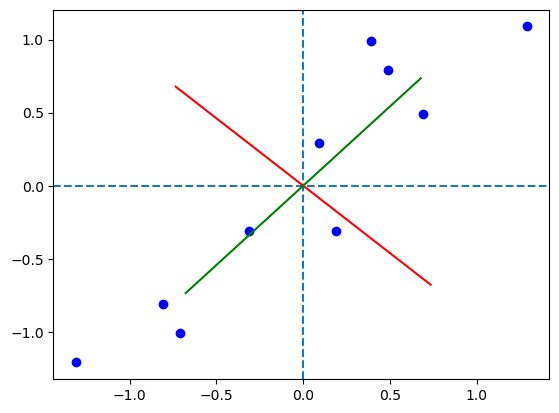

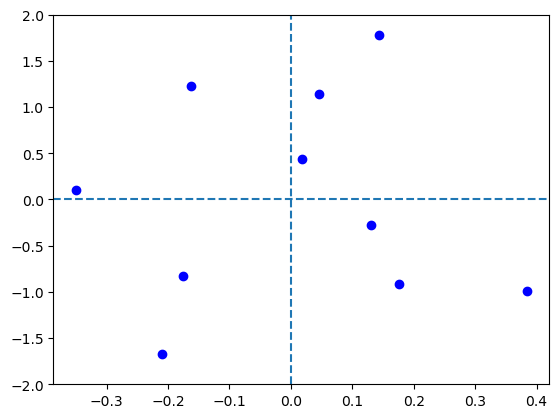

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Get some data
x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1])
y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

# Initial plot
plt.scatter(x, y, c='blue')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.show()

# Center the data
x1 = x - np.mean(x)
y1 = y - np.mean(y)

# Plot centered data
plt.scatter(x1, y1, c='blue')
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.show()

# Create matrix M
M = np.column_stack((x1, y1))

# Compute covariance matrix
cov_M = np.cov(M, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_M)

# Check if eigenvectors are orthogonal
dot_product = np.dot(eigenvectors[:, 0], eigenvectors[:, 1])

# Plot eigenvectors
plt.scatter(x1, y1, c='blue')
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
# First eigenvector (red) and its opposite (light red)
plt.plot([0, eigenvectors[0, 0]], [0, eigenvectors[1, 0]], c='red')
plt.plot([0, -eigenvectors[0, 0]], [0, -eigenvectors[1, 0]], c='red')
# Second eigenvector (green) and its opposite (light green)
plt.plot([0, eigenvectors[0, 1]], [0, eigenvectors[1, 1]], c='green')
plt.plot([0, -eigenvectors[0, 1]], [0, -eigenvectors[1, 1]], c='green')

plt.show()

# Construct principal components
Z = M @ eigenvectors

# Plot PC scores
plt.scatter(Z[:, 0], Z[:, 1], c='blue')
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.ylim(-2, 2)
plt.show()

# Recover initial dataset from Z
M2 = Z @ eigenvectors.T
M2[:, 0] += np.mean(x)
M2[:, 1] += np.mean(y)
difference = M2 - np.column_stack((x, y))


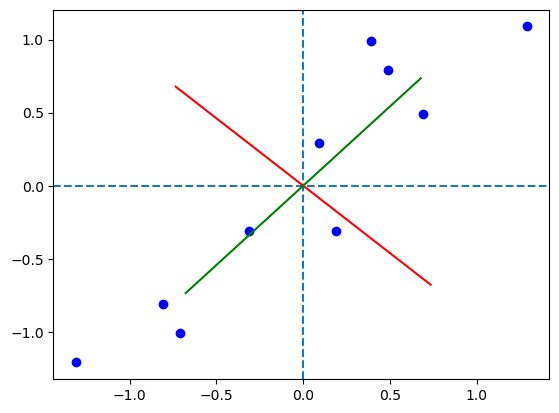

In [19]:
#### PCA using sklearn

pca = PCA()
pca_result = pca.fit_transform(M)

# Plot eigenvectors from PCA
plt.scatter(x1, y1, c='blue')
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
# First eigenvector (red) and its opposite (light red)
plt.plot([0, eigenvectors[0, 0]], [0, eigenvectors[1, 0]], c='red')
plt.plot([0, -eigenvectors[0, 0]], [0, -eigenvectors[1, 0]], c='red')
# Second eigenvector (green) and its opposite (light green)
plt.plot([0, eigenvectors[0, 1]], [0, eigenvectors[1, 1]], c='green')
plt.plot([0, -eigenvectors[0, 1]], [0, -eigenvectors[1, 1]], c='green')

plt.show()

# PCA summary
explained_variance = pca.explained_variance_ratio_

# Scaling the data and PCA
scaled_M = scale(M)
pca_scaled = PCA()
pca_scaled_result = pca_scaled.fit_transform(scaled_M)

# PCA summary for scaled data
explained_variance_scaled = pca_scaled.explained_variance_ratio_
